### Import & Read

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Mall_Customers.csv',sep=',')

In [3]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### Data Cleaning & Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Detecting & Handling missing value

In [5]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Detecting & Handling Outliers

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
plot = data.select_dtypes(include='int64').columns

In [9]:
plot

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

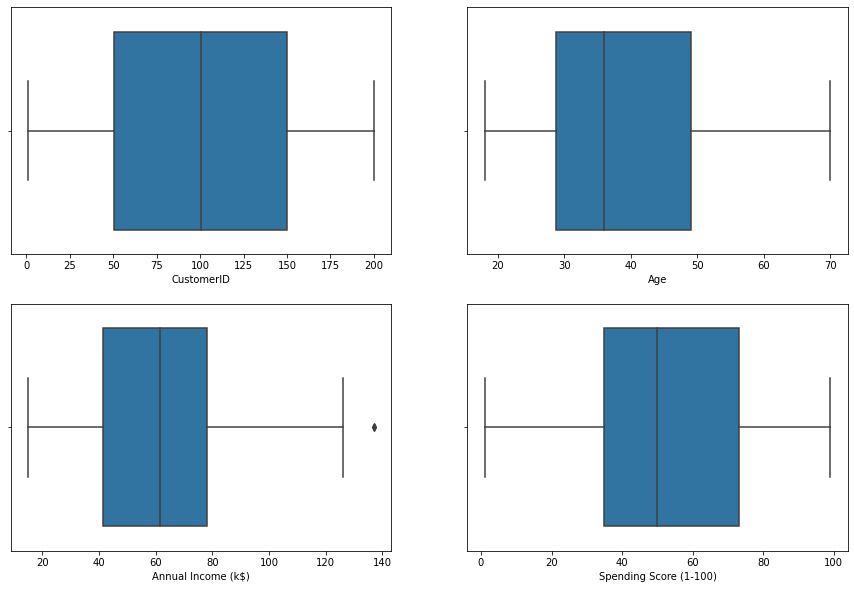

In [10]:
fig, ax = plt.subplots(2,2,figsize=(15,10))

for i, ax in zip(plot, ax.flatten()):
    sns.boxplot(data[i],ax=ax)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Count'>

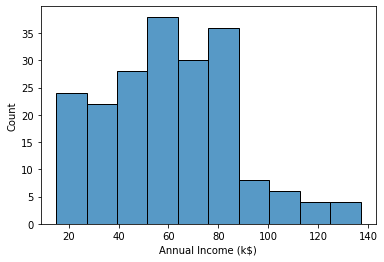

In [11]:
sns.histplot(data['Annual Income (k$)'])

In [12]:
data[data['Annual Income (k$)'] > 120]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


Detecting & Handling Duplicate Values

In [13]:
data.duplicated().any()

False

### Exploratory Data Analysis (EDA)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [15]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [16]:
data.shape

(200, 5)

In [17]:
for column in data.columns:
    print('Count unique data of {} : {}'.format(column,data[column].nunique()))

Count unique data of CustomerID : 200
Count unique data of Gender : 2
Count unique data of Age : 51
Count unique data of Annual Income (k$) : 64
Count unique data of Spending Score (1-100) : 84


<AxesSubplot:>

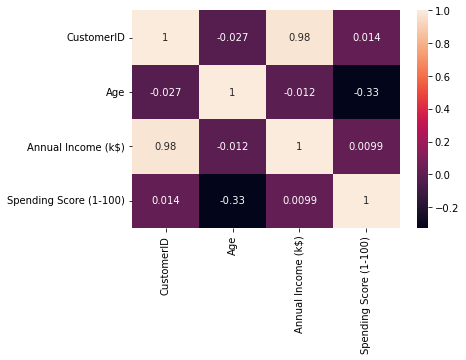

In [18]:
sns.heatmap(data.corr(),annot=True)

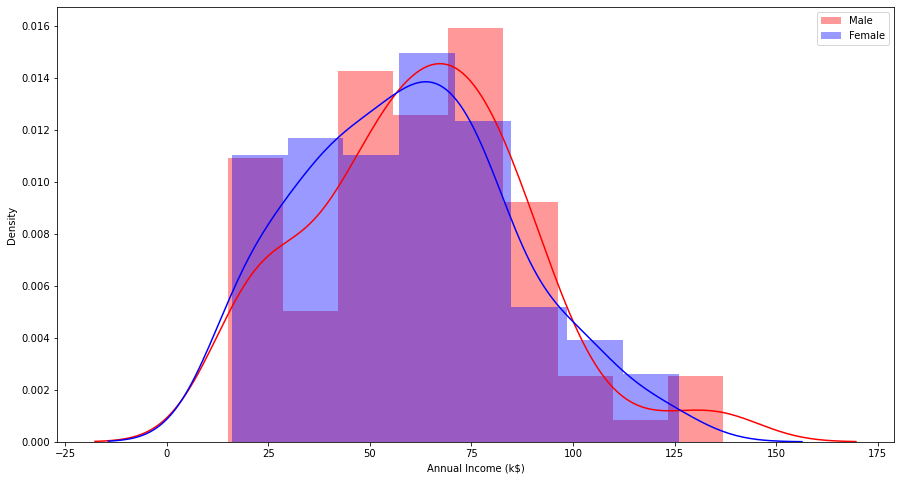

In [19]:
plt.figure(figsize=(15,8))
sns.distplot(data['Annual Income (k$)'][data['Gender']=='Male'],color='r',label='Male')
sns.distplot(data['Annual Income (k$)'][data['Gender']=='Female'],color='b',label='Female')
plt.legend()

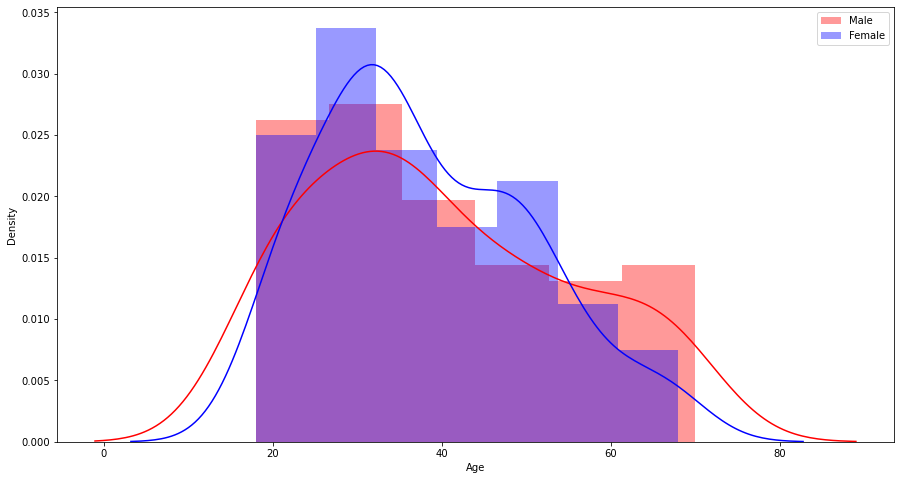

In [20]:
plt.figure(figsize=(15,8))
sns.distplot(data['Age'][data['Gender']=='Male'],color='r',label='Male')
sns.distplot(data['Age'][data['Gender']=='Female'],color='b',label='Female')
plt.legend()

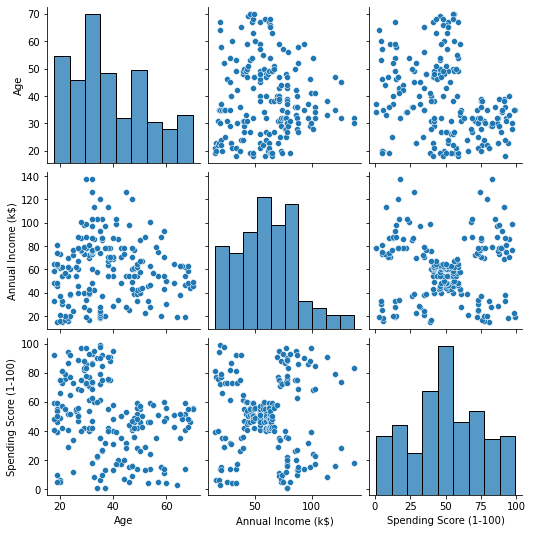

In [21]:
sns.pairplot(data.drop(labels=['CustomerID'],axis=1))

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

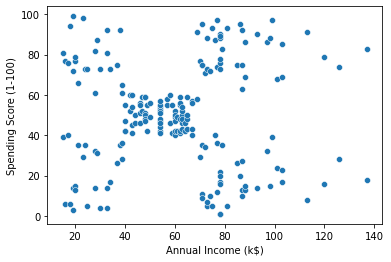

In [22]:
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)')

### Data Preparation

In [23]:
data = data.drop(columns=['CustomerID'])

Encoding (Gender)

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['Gender'] = le.fit_transform(data['Gender'])

In [25]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


### Model & Evaluation

find numbers of optimal clusters (elbow method)

In [26]:
from sklearn.cluster import KMeans

In [27]:
inertia = []
for i in range(1,10):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(data)
    inertia.append(km.inertia_)

<AxesSubplot:>

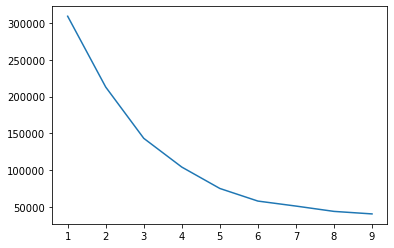

In [28]:
sns.lineplot(x=range(1,10),y=inertia)

In [29]:
km = KMeans(n_clusters=5,random_state=42)
cluster = km.fit_predict(data)

In [30]:
km.cluster_centers_

array([[ 0.39130435, 45.2173913 , 26.30434783, 20.91304348],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.51351351, 40.32432432, 87.43243243, 18.18918919],
       [ 0.41772152, 43.12658228, 54.82278481, 49.83544304],
       [ 0.40909091, 25.27272727, 25.72727273, 79.36363636]])

In [31]:
data['cluster'] = cluster
data

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,19,15,39,0
1,1,21,15,81,4
2,0,20,16,6,0
3,0,23,16,77,4
4,0,31,17,40,0
...,...,...,...,...,...
195,0,35,120,79,1
196,0,45,126,28,2
197,1,32,126,74,1
198,1,32,137,18,2


In [32]:
result1 = data.groupby(['cluster']).agg({"Age": "mean","Annual Income (k$)":"mean","Spending Score (1-100)":"mean","Gender":"mean"})
result1

,Age,Annual Income (k$),Spending Score (1-100),Gender
cluster,,,,
0,45.217391,26.304348,20.913043,0.391304
1,32.692308,86.538462,82.128205,0.461538
2,40.324324,87.432432,18.189189,0.513514
3,43.126582,54.822785,49.835443,0.417722
4,25.272727,25.727273,79.363636,0.409091


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

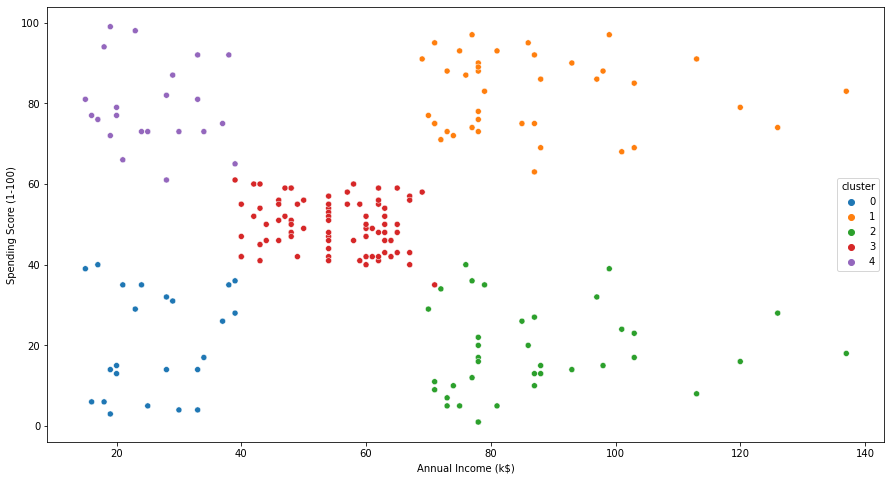

In [33]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=data, x="Annual Income (k$)",y="Spending Score (1-100)",hue="cluster",palette='tab10')